## Pynapple's Allen Brain Atlas Neuropixel's Tutorial ##

The beauty of Pynapple's IO is that loaders can be customized for any format of data. Pynapple has many premade loaders, one of which being for the Allen Brain Atlas' Neuropixels dataset. The Neuropixels dataset contains electrophysiological data of the visual cortex and thalamus of mice who are shown passive visual stimuli. For more details about the dataset, please visit Allen Documentation.

This tutorial will demonstrate how to use Pynapple's loader for the Allen Neuropixels data and various anlayses with the data.

Before you begin, make sure you have sufficient storage to download sessions from the database. The session sizes average about ~2gb.


Let's get started!


In [78]:
# import libraries
import pynapple as nap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

To load a Neuropixels session, as with all data loading in Pynapple, call Pynapple's **load_session()** function.
- ***path***= where the Neuropixels data is downloaded/where it has been downloaded
- ***session_type***="allends" indicates that we are loading data from the Allen Institute (DS = dataset).

When you run the following cell, a GUI will appear. Using the GUI, choose from the two types of sessions in the Neuropixels database: 1) Brain observatory or 2) Functional connectivity. Then select the session ID you would like to load.

Note: *If this is your first time loading this session with pynapple, the loading will take a while as the data is first downloaded to your local system (to the path you indicated). If you have already loaded this session, loading the data will take a minute or so.*

In this tutorial, I am accessing session #715093703 in Brain Observatory.

In [3]:
# path to where data will be donwloaded
path = r"C:\Users\scalgi\OneDrive - McGill University\Peyrache Lab\Data\pynapple_test"

# load the data
data = nap.load_session(path, session_type="allends") # type: nap.io.allennp.AllenNP

From our ***data*** object, we can access the following attributes:
   - **epochs**: a dictionary of **IntervalSet** that holds the start and end times of session epochs. In this dataset, **epochs** is trivial: there is only one epoch which is the session itself, under the key *session*.
   - **stimulus_epochs_types**: a dictionary of **IntervalSet**s that holds the start and end times of stimulus epochs, defined by the name of the stimulus type
   - **stimulus_epochs_blocks**: a dictionary of **IntervalSet**s that holds the start and end times of stimulus epoch, defined by the block of the stimulus. Each stimulus block contains one type of stimulus, and the block number indicates the order of when this block of stimulus was shown. Lack of stimulus (i.e. "spontaneous") is not given a block number.
   - **stimulus_intervals**: a dictionary of **IntervalSet**s that holds the start and end times of each presentation of of each stimulus type
   - **optogenetic_stimulus_epochs**: an **IntervalSet** that holds the start and end times of optogenetic stimulus epochs
   - **spikes**: a **TsGroup**, which holds spike times for each unit and metadata on each unit
   - **metadata**: a dictionary of various Pandas DFs that holds various types of information:
      - **stimulus_presentations**: information about each stimulus presentation
      - **stimulus_conditions**: Each distinct stimulus state is called a "stimulus condition". Table holds additional information about each unique stimulus
      - **stimulus_parameters**: Dictionary of all stimulus parameters as keys and their range of values as values
      - **channels**:
      - **probes**:
      - **units**: information about each unit identified in the session, including location in the brain
   - **time_support**: an **IntervalSet** containing the global time support based on **epochs**
   - **stimulus_time_support**: an **IntervalSet** containing the intervals of all stimulus blocks, providing a time support for stimuli


# Analyzing Neural Activity in the Primary Visual Cortex #
In this tutorial, we will be analyzing the neural activity of neurons in the primary visual cortex while also understanding the usage and capabilities of Pynapple's loader for Allen Neuropixel data.

## Overview of Metadata ##
First, let's get a grasp of the metadata we have access to.

In [4]:
# data metadata
print("Stimulus presentations:")
stimulus_presentations = data.metadata["stimulus_presentations"]
print(stimulus_presentations)

print("Stimulus conditions")
stimulus_conditions = data.metadata["stimulus_conditions"]
print(stimulus_conditions)

print("Stimulus parameters:")
stimulus_parameters = data.metadata["stimulus_parameters"]
print(stimulus_parameters)

print("Probes:")
probes = data.metadata["probes"]
print(probes)

print("Channels:")
channels = data.metadata["channels"]
print(channels)

Stimulus presentations:
                         color contrast frame orientation  \
stimulus_presentation_id                                    
0                         null     null  null        null   
1                         null      0.8  null        45.0   
2                         null      0.8  null         0.0   
3                         null      0.8  null        45.0   
4                         null      0.8  null         0.0   
...                        ...      ...   ...         ...   
70383                     null      0.8  null        60.0   
70384                     null      0.8  null        90.0   
70385                     null      0.8  null        60.0   
70386                     null      0.8  null        60.0   
70387                     null      0.8  null        60.0   

                                                   phase            size  \
stimulus_presentation_id                                                   
0                             

## Accessing Units of Interest (V1) ##

Recall that we want to look at neuronal activity in V1.

All unit information is stored within **data.spikes**, which is a Pynapple object called TsGroup. data.spikes holds spike times for each unit alongside metadata information about each unit, including in which brain structure they are recorded from.

Let's see the units we have in our session:

In [5]:
spikes = data.spikes
print(spikes.index)

[950910352 950910364 950910371 950910392 950910435 950910463 950910531
 950910549 950910558 950910576 950910603 950910651 950910664 950910671
 950910727 950910742 950910757 950910778 950910834 950910861 950910889
 950910897 950910904 950910941 950911006 950911040 950911088 950911195
 950911223 950911266 950911286 950911467 950911563 950911586 950911593
 950911601 950911656 950911677 950911684 950911691 950911698 950911704
 950911732 950911873 950911880 950911932 950911986 950912018 950912065
 950912109 950912164 950912190 950912214 950912226 950912249 950912283
 950912293 950912326 950912361 950912384 950912396 950912406 950912417
 950912427 950912448 950912460 950912473 950912511 950912601 950912646
 950912803 950912814 950912928 950912940 950912952 950913000 950913031
 950913096 950913409 950913422 950913456 950913470 950913506 950913517
 950913527 950913537 950913547 950913567 950913588 950913652 950913676
 950913684 950913766 950913796 950913806 950913850 950913877 950913893
 95091

To see what metadata is stored within **spikes**:

In [6]:
print(spikes.metadata_columns)

['rate', 'waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff', 'cluster_id', 'cumulative_drift', 'd_prime', 'firing_rate', 'isi_violations', 'isolation_distance', 'L_ratio', 'local_index', 'max_drift', 'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id', 'presence_ratio', 'waveform_recovery_slope', 'waveform_repolarization_slope', 'silhouette_score', 'snr', 'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below', 'waveform_duration', 'filtering', 'probe_channel_number', 'probe_horizontal_position', 'probe_id', 'probe_vertical_position', 'structure_acronym', 'ecephys_structure_id', 'ecephys_structure_acronym', 'anterior_posterior_ccf_coordinate', 'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate', 'probe_description', 'location', 'probe_sampling_rate', 'probe_lfp_sampling_rate', 'probe_has_lfp_data']


Now, we want to get the units that are in the primary visual cortex (V1), as these are neurons that are most likely to have orientation tuning and receptive fields. The metadata column that corresponds to location in the brain is "ecephys_structure_acronym".

We can use **TsGroup**'s functionality to organize the units based on columns in the unit's metadata. This function is called **getby_category()**. Let's see how we can use it for our purposes:

In [77]:
# organize units by structure
units_structures = spikes.getby_category("ecephys_structure_acronym")

*units_structures* is a dictionary of TsGroups, with the structure names as keys.

Note that because the data has so many columns, the data looks pretty messy. If you only had a few metadata columns, you'd see a nice dictionary of TsGroup tables.

Let's look at the names of the structures we are working on by getting the keys of the dictionary.

In [8]:
# take a look at the structure names
units_structures.keys()

dict_keys(['APN', 'CA1', 'CA3', 'DG', 'LGd', 'LP', 'PO', 'PoT', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl', 'grey'])

<BarContainer object of 14 artists>

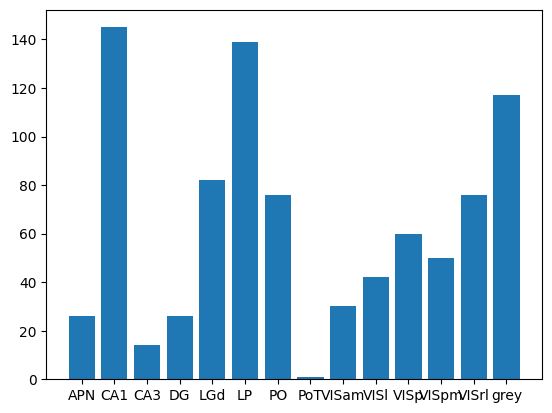

In [9]:
brain_areas = units_structures.keys()
unit_count_by_brain_region = [len(units_structures[key]) for key in brain_areas]

plt.bar(brain_areas,unit_count_by_brain_region)

Nice! Looks like we have a decent number of units in the primary visual cortex ("VISp"). Let's retrieve these units from the dictionary *units_structures*.

In [10]:
v1_units = units_structures["VISp"]

# how many units did we get?
print("Number of units in V1: %s" % len(v1_units))

Number of units in V1: 60


Now, from the units in V1, we also want to get the units that have a high signal-to-noise (SNR) ratio. If you look above, you can see that this information is also stored in the metadata under "snr".

We can use the **TsGroup**'s *getby_threshold()* function to do this. Rather than a dictionary of TsGroups, this function just returns a new TsGroup with units that obey the given threshold.

Let's get units with an SNR > 4:

In [11]:
v1_high_snr_units = v1_units.getby_threshold("snr", 4) # default operator is >, but other ones can be passed via an optional argument

# how many units did we get?
print("Number of units in V1: %s" % len(v1_high_snr_units))

# what are the IDs of the units?
v1_unit_IDs = v1_high_snr_units.keys()
print("V1 Unit IDs: %s" % v1_unit_IDs)

Number of units in V1: 6
V1 Unit IDs: [950930985, 950931458, 950931533, 950931727, 950931751, 950932696]


Awesome! We can quickly visualize the units' activity over time with **TsGroup**'s *count()* function, which counts the number of spikes of each unit within intervals of time.

The default intervals of the *count()* function are based on the global time support of the data. In this database, the global session epoch is the entire session. Let's first use the default interval and specify the bin size in seconds. Here, I'm setting the bin size to 1s.

In [12]:
spike_counts = v1_high_snr_units.count(bin_size=1)
spike_counts

,950930985,950931458,950931533,950931727,950931751,950932696
Time (s),,,,,,
0.5,0,0,0,0,0,0
1.5,0,0,0,0,0,0
2.5,0,0,0,0,0,0
3.5,0,0,0,0,0,0
4.5,0,0,0,0,0,0
...,...,...,...,...,...,...
9547.5,9,7,3,4,0,0
9548.5,40,12,10,9,1,0
9549.5,32,10,7,7,0,0


Nice! With this table, we have everything we need to plot spike counts per time interval.
Let's go ahead and plot it for each of our units. This will take a few minutes since the bin number is so high.

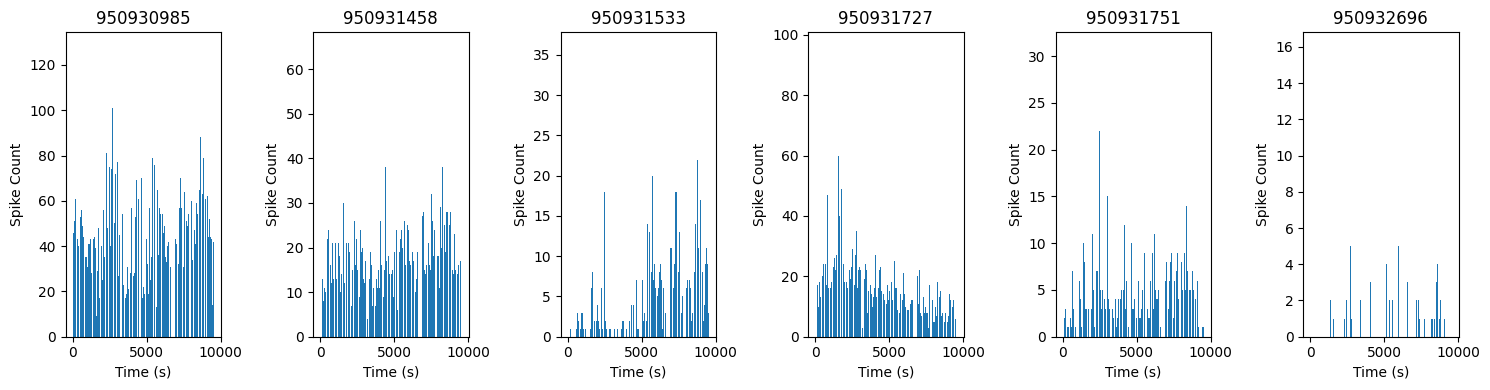

In [13]:
# Create 1x6 grid of subplots
fig, axs = plt.subplots(1,6,figsize=(15,4))
time_intervals = spike_counts.index

# Iterate over each neuron and plot the spike count data
for i, (unit_id, ax) in enumerate(zip(v1_unit_IDs, axs)):
    ax.bar(time_intervals, spike_counts[unit_id])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Spike Count')
    ax.set_title(unit_id)

plt.tight_layout()
plt.show()

We can also easily count the number of spikes per stimulus epoch. In this dataset, animals were exposed to a standardized set of visual stimuli. The stimulus epochs are stored as *data.stimulus_epochs_types* (epochs organized by the type of stimulus) and as *data.stimulus_epochs_blocks* (epochs organized by the stimulus block).

Let's see what stimuli we are working with:

In [14]:
stimulus_epochs_types = data.stimulus_epochs_types
stimulus_epochs_blocks = data.stimulus_epochs_blocks
print("Stimulus names: %s" % stimulus_epochs_types.keys())
print("Stimulus blocks: %s" % stimulus_epochs_blocks.keys())

Stimulus names: dict_keys(['drifting_gratings', 'flashes', 'gabors', 'natural_movie_one', 'natural_movie_three', 'natural_scenes', 'spontaneous', 'static_gratings'])
Stimulus blocks: dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 'null'])


Let's get a better understanding of how the stimulus information is organized.

Each block interval provides the beginning and end of the given block of stimulus presentations, stored is *stimulus_epochs_blocks*
Each stimulus blocks contains only one type of stimulus, however, there are multiple blocks of one kind of stimulus. Each **IntervalSet** in *stimulus_epochs_types* represents one block of stimulus.
Individual stimulus interval of a given stimulus type is stored in *stimulus_intervals*.

For example, from Allen Neuropixels' documentation, we know that drifting gratings are shown in multiple blocks, specifically block 2, 5, and 7. Within these blocks, there are individual stimulus presentations of various conditions.

Let's take a look:

In [15]:
# Drifting gratings epochs:
drifting_gratings = stimulus_epochs_types["drifting_gratings"]
print("Drifting gratings epochs: \n%s \n" %drifting_gratings)

# Block 2, 5 and 7 epochs
print("Block 2 intervals \n%s: " % stimulus_epochs_blocks[2])
print("Block 5 intervals \n%s: " % stimulus_epochs_blocks[5])
print("Block 7 intervals \n%s: " % stimulus_epochs_blocks[7])

Drifting gratings epochs: 
         start          end
0  1574.774823  2174.275707
1  3166.137683  3765.638457
2  4697.416823  5380.987797 

Block 2 intervals 
         start          end
0  1574.774823  2174.275707: 
Block 5 intervals 
         start          end
0  3166.137683  3765.638457: 
Block 7 intervals 
         start          end
0  4697.416823  5380.987797: 


Notice how the epochs defined by stimulus type and block line up? *type* and *block* are two ways of organizing the stimulus epochs, which one you use depends on your analysis goals.

Now, let's take a look at the stimulus presentation intervals of all drifting gratings:


In [16]:
stimulus_intervals = data.stimulus_intervals
drifting_gratings_intervals = stimulus_intervals['drifting_gratings']
drifting_gratings_intervals

,start,end
0,1574.774823,1576.776513
1,1577.777347,1579.779027
2,1580.779833,1582.781563
3,1583.782367,1585.784047
4,1586.784883,1588.786553
...,...,...
5,5366.976107,5368.977777
6,5369.978603,5371.980283
7,5372.981107,5374.982807
8,5375.983663,5377.985343


Notice that the first start time and the last end time matches that of the start and end time of the drifting gratings stimulus epochs.

To get the stimulus interval for only one of the blocks, you can use **IntervalSet**'s *intersect* function, which finds the common times between two **IntervalSet**s. Let's find the stimulus intervals of drifting gratings in block 2 as an example:

In [17]:
block2_stimulus_epochs = stimulus_epochs_blocks[2]
drifting_gratings_block_2_intervals = drifting_gratings_intervals.intersect(block2_stimulus_epochs)
drifting_gratings_block_2_intervals

,start,end
0,1574.774823,1576.776513
1,1577.777347,1579.779027
2,1580.779833,1582.781563
3,1583.782367,1585.784047
4,1586.784883,1588.786553
...,...,...
5,2160.263967,2162.265657
6,2163.266503,2165.268183
7,2166.269007,2168.270667
8,2169.271543,2171.273213



To see a  visualization of the stimulus epochs, see here: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/0f/5d/0f5d22c9-f8f6-428c-9f7a-2983631e72b4/neuropixels_cheat_sheet_nov_2019.pdf

To look at the overall set of available parameters, we can access it through the metadata as follows:

In [18]:
for key, values in stimulus_parameters.items():
    print(f'{key}:{values}')

color:[-1.0 1.0]
contrast:[0.8 1.0]
frame:[0.0 1.0 2.0 ... 3598.0 3599.0 -1.0]
orientation:[45.0 0.0 90.0 315.0 225.0 135.0 270.0 180.0 120.0 150.0 60.0 30.0]
phase:['[3644.93333333, 3644.93333333]' '[0.0, 0.0]'
 '[21211.93333333, 21211.93333333]' '0.5' '0.75' '0.0' '0.25']
size:['[20.0, 20.0]' '[300.0, 300.0]' '[250.0, 250.0]' '[1920.0, 1080.0]']
spatial_frequency:['0.08' '[0.0, 0.0]' '0.04' 0.32 0.08 0.04 0.02 0.16]
temporal_frequency:[4.0 8.0 2.0 1.0 15.0]
x_position:[0.0 -30.0 10.0 -40.0 -10.0 40.0 30.0 20.0 -20.0]
y_position:[30.0 -10.0 20.0 -40.0 -20.0 0.0 -30.0 40.0 10.0]


Great, now that we have a good understanding of the stimuli in this session, we can start examining the activity of the V1 units of interest in relation to the  stimuli.

## Analyzing the Neural Response in V1 to Visual Stimuli ##
Now that we've acquired units from V1 and have explored our data and stimuli, we now do some analysis. Specifically, we're going to look at the response of V1 neurons to visual stimuli.

## 1D Orientation Tuning Curves ##

*This section of the tutorial is adopted from Seigle et al (2021) Dataset Tutorial by Dhruv Mehrotra*

V1 neurons are known to have orientation specific tuning. In this dataset, we have static grating stimuli which varies in orientation. We are going to compute the tuning curve of V1 neurons to the orientations.

To do this, first we need to get information about the static grating stimulus presentations, as follows:

In [28]:
drifting_gratings_presentations = stimulus_presentations[stimulus_presentations['stimulus_name']=='drifting_gratings']
drifting_gratings_presentations

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3798,null,0.8,null,315.0,"[21211.93333333, 21211.93333333]","[250.0, 250.0]",0.04,1574.774823,2.0,drifting_gratings,1576.776513,4.0,null,null,2.00169,246
3799,null,0.8,null,90.0,"[21211.93333333, 21211.93333333]","[250.0, 250.0]",0.04,1577.777347,2.0,drifting_gratings,1579.779027,8.0,null,null,2.00168,247
3800,null,0.8,null,225.0,"[21211.93333333, 21211.93333333]","[250.0, 250.0]",0.04,1580.779833,2.0,drifting_gratings,1582.781563,2.0,null,null,2.00173,248
3801,null,0.8,null,90.0,"[21211.93333333, 21211.93333333]","[250.0, 250.0]",0.04,1583.782367,2.0,drifting_gratings,1585.784047,2.0,null,null,2.00168,249
3802,null,0.8,null,135.0,"[21211.93333333, 21211.93333333]","[250.0, 250.0]",0.04,1586.784883,2.0,drifting_gratings,1588.786553,8.0,null,null,2.00167,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49426,null,0.8,null,135.0,"[21211.93333333, 21211.93333333]","[250.0, 250.0]",0.04,5366.976107,7.0,drifting_gratings,5368.977777,15.0,null,null,2.00167,274
49427,null,0.8,null,180.0,"[21211.93333333, 21211.93333333]","[250.0, 250.0]",0.04,5369.978603,7.0,drifting_gratings,5371.980283,8.0,null,null,2.00168,260
49428,null,0.8,null,0.0,"[21211.93333333, 21211.93333333]","[250.0, 250.0]",0.04,5372.981107,7.0,drifting_gratings,5374.982807,1.0,null,null,2.00170,251


Let's see what orientations we have:

In [26]:
orientations = drifting_gratings_presentations['orientation'].values # get oreintations of the static gratings
orientations

array([315.0, 90.0, 225.0, 90.0, 135.0, 0.0, 315.0, 315.0, 270.0, 90.0,
       0.0, 315.0, 270.0, 'null', 'null', 315.0, 315.0, 315.0, 180.0,
       'null', 45.0, 315.0, 90.0, 270.0, 135.0, 90.0, 135.0, 135.0, 135.0,
       45.0, 315.0, 0.0, 180.0, 0.0, 315.0, 315.0, 45.0, 90.0, 180.0,
       'null', 135.0, 225.0, 0.0, 135.0, 45.0, 315.0, 225.0, 0.0, 45.0,
       270.0, 135.0, 180.0, 180.0, 180.0, 90.0, 0.0, 0.0, 90.0, 225.0,
       90.0, 'null', 45.0, 'null', 270.0, 45.0, 180.0, 225.0, 225.0, 45.0,
       90.0, 315.0, 270.0, 270.0, 270.0, 0.0, 45.0, 270.0, 270.0, 225.0,
       270.0, 180.0, 180.0, 315.0, 45.0, 90.0, 270.0, 315.0, 135.0, 315.0,
       45.0, 135.0, 'null', 225.0, 180.0, 90.0, 225.0, 180.0, 90.0, 315.0,
       270.0, 135.0, 270.0, 180.0, 315.0, 0.0, 315.0, 225.0, 45.0, 90.0,
       0.0, 135.0, 0.0, 45.0, 90.0, 90.0, 135.0, 270.0, 270.0, 45.0,
       225.0, 45.0, 180.0, 180.0, 90.0, 90.0, 90.0, 270.0, 0.0, 315.0,
       225.0, 180.0, 270.0, 45.0, 315.0, 45.0, 135.0, 45.0,

We can see that there are some null values. Let's convert these values to floats for better handling.

In [30]:
orientations[orientations=='null'] = np.nan # replace all null values to NaN
orientations = orientations.astype(float) # convert to float array
angle_range = np.unique(orientations)[0:-1] # find all unique values excluding NaNs
angle_range

C:\Users\scalgi\AppData\Local\Temp\ipykernel_28112\2497237455.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  orientations[orientations=='null'] = np.nan # replace all null values to NaN


array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

These are the 8 orientations of the driftig gratings, sampling 360 degrees at 45 degree intervals.

Now we need to access information from *stimulus_presentations* metadata and load it as a Pynapple object. Specifically, we need to create a dictionary of IntervalSets for each orientation.

First, we need stimulus intervals for drifting gratings to organize by orientation.

In [31]:
drifting_gratings_intervals =  stimulus_intervals['drifting_gratings']
drifting_gratings_intervals

,start,end
0,1574.774823,1576.776513
1,1577.777347,1579.779027
2,1580.779833,1582.781563
3,1583.782367,1585.784047
4,1586.784883,1588.786553
...,...,...
5,5366.976107,5368.977777
6,5369.978603,5371.980283
7,5372.981107,5374.982807
8,5375.983663,5377.985343


Great. Now let's proceed to sorting these intervals into **IntervalSet**s by their orientation

In [32]:
dict_ori = {}

for angle in angle_range:
    tokeep = [] # list of trials to keep

    for i in range(len(drifting_gratings_presentations)): # loop over all gabors trials
        if float(orientations[i]==angle): # find trials with given orientation
            tokeep.append(i)
    dict_ori[angle] = drifting_gratings_intervals.loc[tokeep] # make dictionary of IntervalSets

dict_ori

{0.0:           start          end
 0   1589.787377  1591.789047
 1   1604.799993  1606.801573
 2   1667.852587  1669.854267
 3   1673.857607  1675.859277
 4   1700.880223  1702.881873
 ..          ...          ...
 69  5237.868283  5239.869913
 70  5279.903393  5281.905073
 71  5312.930947  5314.932627
 72  5348.961047  5350.962727
 73  5372.981107  5374.982807
 
 [74 rows x 2 columns],
 45.0:           start          end
 0   1634.824993  1636.826683
 1   1661.847597  1663.849267
 2   1682.865123  1684.866833
 3   1706.885213  1708.886883
 4   1718.895253  1720.896963
 ..          ...          ...
 70  5180.820607  5182.822277
 71  5234.865757  5236.867417
 72  5243.873283  5245.874953
 73  5336.951027  5338.952697
 74  5360.971097  5362.972757
 
 [75 rows x 2 columns],
 90.0:           start          end
 0   1577.777347  1579.779027
 1   1583.782367  1585.784047
 2   1601.797417  1603.799097
 3   1640.830033  1642.831703
 4   1649.837547  1651.839217
 ..          ...          ...
 

This dictionary has the *drifting_gratings_intervals* sorted by orientation. We can use these to compute orientation tuning curves. Since the stimuli are presented in discrete orientations (i.ae. not spanning all angular values from 0 to 90 degrees), we will be using Pynapple's *compute_discrete_tuning_curves*.

We can calculate tuning curves with one line with Pynapple!

In [33]:
# Plot firing rate of V1 units as a function of orientation, i.e. an orientation tuning curve
discrete_tuning_curves = nap.compute_discrete_tuning_curves(v1_high_snr_units, dict_ori)

discrete_tuning_curves

,950930985,950931458,950931533,950931727,950931751,950932696
0.0,29.995305,10.423757,1.829558,23.304928,2.848980,0.067511
45.0,44.840722,15.482074,3.244307,23.389656,3.430838,0.133236
90.0,33.685112,16.839225,1.825138,14.194774,3.084083,0.006661
135.0,17.431332,16.000099,4.793279,19.017840,3.659094,0.567092
180.0,33.585341,13.109074,1.971690,27.217315,4.336386,0.686095
225.0,45.734898,14.614385,4.782647,22.894093,3.843437,0.293087
270.0,38.394459,14.281353,1.731881,13.681856,2.804314,0.079933
315.0,19.910011,14.840918,4.216473,20.476204,2.930882,0.526226


Each column is a unit, and each row is the orientation of the stimulus in degrees. The values in the table represent the firing rate of the unit in Hz. Let's plot them!

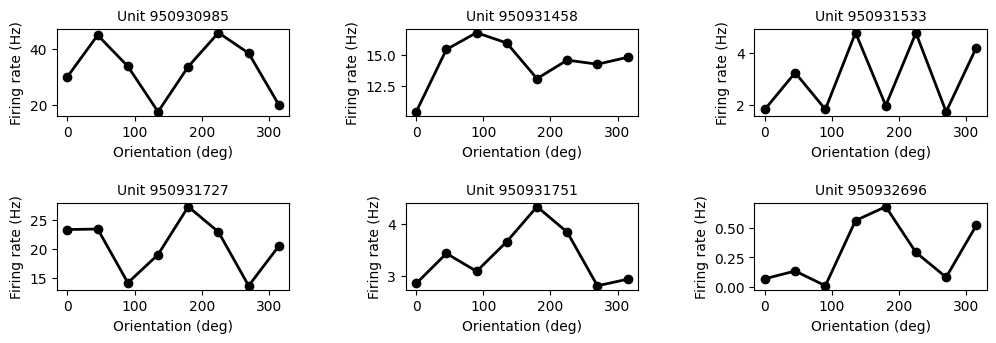

In [34]:
plt.figure(figsize=(12,9))
for i in range(len(v1_unit_IDs)): # loop over all unit IDs
    plt.subplot(2,3,i+1) # plot tuning curves in 2 rows and 3 columns
    plt.plot(discrete_tuning_curves[v1_unit_IDs[i]], 'o-', color='k', linewidth=2)
    plt.xlabel('Orientation (deg)')
    plt.ylabel('Firing rate (Hz)')
    plt.title("Unit %d" % v1_unit_IDs[i], fontsize=10)
    plt.subplots_adjust(wspace=0.5, hspace=1, top=0.4)

Nice! Looks like some of these neurons have some degree of orientation tuning.

### Calculating 2D Spatial Tuning Curves ###
Neurons in V1 are known to have spatial tuning based on the location of the stimulus in space.

The gabors stimuli are shown on various locations on the screen. The x-y location of stimuli can be found in the *stimulus_presentations* metadata. Here, we will go through how we can access this metadata and use it to calculate 2D spatial tuning curves.

Let's first get a table of stimulus presentations for gabors to look at the metadata for this stimulus.

In [35]:
gabors_presentations = stimulus_presentations[stimulus_presentations['stimulus_name']=='gabors']
gabors_presentations

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
1,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,73.537433,0.0,gabors,73.770952,4.0,0.0,30.0,0.233519,1
2,null,0.8,null,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,73.770952,0.0,gabors,74.021150,4.0,-30.0,-10.0,0.250199,2
3,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,74.021150,0.0,gabors,74.271349,4.0,10.0,20.0,0.250199,3
4,null,0.8,null,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,74.271349,0.0,gabors,74.521547,4.0,-40.0,-40.0,0.250199,4
5,null,0.8,null,90.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,74.521547,0.0,gabors,74.771764,4.0,-10.0,-10.0,0.250216,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,984.281513,0.0,gabors,984.531719,4.0,30.0,-10.0,0.250206,192
3642,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,984.531719,0.0,gabors,984.781925,4.0,-20.0,10.0,0.250206,39
3643,null,0.8,null,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,984.781925,0.0,gabors,985.032131,4.0,-30.0,40.0,0.250206,186


Now, we need to extract the x- and y-position from the metadata and load it into a **TsdFrame**.

In [36]:
# extract x- and y-position columns
x_positions = np.array(gabors_presentations['x_position']).tolist()
y_positions = np.array(gabors_presentations['y_position']).tolist()

# load into x and y positions into a vstack
xy_positions = np.vstack((x_positions,y_positions)).T

# what does this look like?
xy_positions

array([[  0.,  30.],
       [-30., -10.],
       [ 10.,  20.],
       ...,
       [-30.,  40.],
       [ 10., -30.],
       [-40.,  40.]])

Now let's load the xy positions into a **TsdFrame**. Since we will use the absolute start times as the time index (see below), we don't need to provide additional time support. When no time support is passed, the default global time support is used.

In [37]:
# get start time as start time of the stimulus presentations
time_index = (gabors_presentations['start_time']).values

# load TsdFrame
xy_features = nap.TsdFrame(t=time_index, d=xy_positions, time_units="s", columns=['x','y'])

# what does this look like?
xy_features

,x,y
Time (s),,
73.537433,0.0,30.0
73.770952,-30.0,-10.0
74.021150,10.0,20.0
74.271349,-40.0,-40.0
74.521547,-10.0,-10.0
...,...,...
984.281513,30.0,-10.0
984.531719,-20.0,10.0
984.781925,-30.0,40.0


Great! Almost there. To compute the 2D tuning curve, it just takes one line with Pynapple!

In [41]:
# using bin size of 9 since x-y stimulus is shown in a 9x9 grid (-40,-30,-20,-10,0,10,20,30,40)
spatial_tuning_curve, binsxy = nap.compute_2d_tuning_curves(group=v1_high_snr_units,feature=xy_features, nb_bins=9)

In [42]:
spatial_tuning_curve

{950930985: array([[39.71176567, 44.15379762, 44.7756821 , 42.82118804, 39.00104056,
         41.13321589, 43.70959443, 40.60017206, 37.40190905],
        [35.62509627, 45.04220401, 47.79626383, 45.21988529, 43.44307251,
         40.2448095 , 37.57959033, 36.33582138, 40.15596886],
        [41.31089717, 45.13104465, 46.55249488, 44.15379762, 41.75510037,
         43.53191315, 35.26973372, 38.645678  , 39.97828759],
        [37.49074969, 44.7756821 , 45.39756657, 39.97828759, 41.13321589,
         38.29031544, 39.71176567, 40.51133142, 39.35640311],
        [45.39756657, 39.88944695, 37.31306841, 41.31089717, 36.86886522,
         38.11263417, 41.66625973, 39.53408439, 37.49074969],
        [45.75292913, 38.82335928, 39.00104056, 40.2448095 , 41.75510037,
         39.26756247, 39.0898812 , 42.64350676, 45.39756657],
        [41.93278165, 44.06495698, 44.15379762, 43.35423187, 39.71176567,
         35.09205244, 39.44524375, 42.99886932, 38.46799672],
        [41.04437526, 42.82118804, 44

Now we have calculated the 2D spatial tuning curve for our neurons in V1! Let's plot it with a heat map.

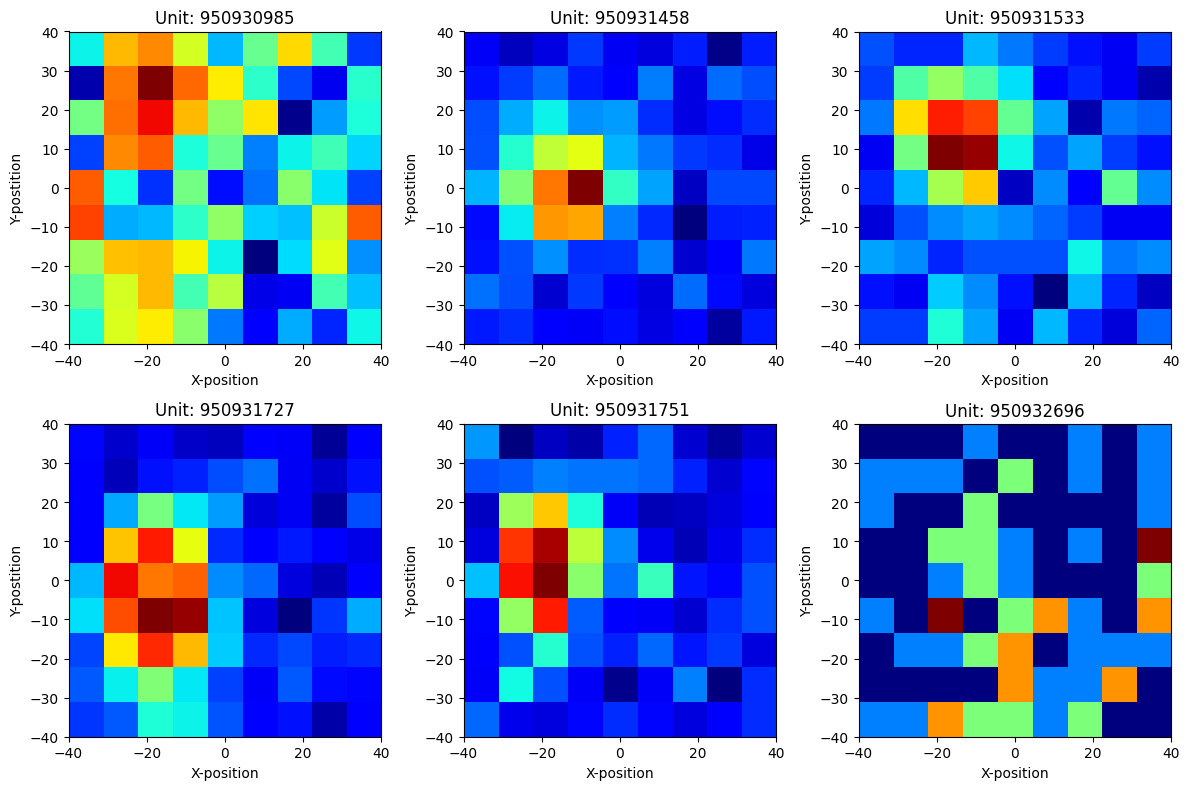

In [75]:
import seaborn as sns
#set the x and y axis limits
extent = [-40, 40, -40, 40]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over each unit and plot the heatmap in a subplot
for i, unit in enumerate(v1_unit_IDs):
    values = spatial_tuning_curve[unit]

    # Select the current subplot
    ax = axs[i // 3, i % 3]

    # Create the heatmap using seaborn with adjusted aspect ratio
    ax.imshow(spatial_tuning_curve[unit], cmap='jet', extent=extent, vmin=np.min(values), vmax=np.max(values))
    #sns.heatmap(values, cmap='YlGnBu', vmin=np.min(values), vmax=np.max(values), cbar=True, ax=ax, extent=extent)

    # Set the title and axis labels
    ax.set_title(f'Unit: {unit}')
    ax.set_xlabel('X-position')
    ax.set_ylabel('Y-postition')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Awesome! Looks like some of our units show a great deal of spatial tuning.